# New Features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Amazon_Gt_10')

In [3]:
meta_data = pd.read_csv('meta_data')

In [4]:
df.head()

Unnamed: 0      reviewerID        asin                     reviewerName  \
0           1   AMO214LNFCEI4  0528881469                  Amazon Customer   
1           2  A3N7T0DY83Y4IG  0528881469                    C. A. Freeman   
2           3  A1H8PY3QHMQQA0  0528881469         Dave M. Shaw "mack dave"   
3          56  A3QH8VQDE7HZCR  0972683275                   costaricachris   
4          82  A38FGQVJM18OWV  0972683275  George S. Mitchell "gsmitchell"   

    helpful                                         reviewText  overall  \
0  [12, 15]  I'm a professional OTR truck driver, and I bou...      1.0   
1  [43, 45]  Well, what can I say.  I've had this unit in m...      3.0   
2   [9, 10]  Not going to write a long review, even thought...      2.0   
3  [15, 19]  Quality was excellent. Instructions were clear...      5.0   
4   [8, 18]  I checked around Amazon as well as some other ...      1.0   

                    summary  unixReviewTime   reviewTime  helpfulness_score  \
0         Very Disappointed      1290643200  11 25, 2010           0.800000   
1            1st impression      1283990400   09 9, 2010           0.955556   
2   Great grafics, POOR GPS      1290556800  11 24, 2010           0.900000   
3  Real value for the money      1286236800   10 5, 2010           0.789474   
4     What a piece of junk!      1291161600   12 1, 2010           0.444444   

   user_deviation  review_delay  
0        1.399189       6652800  
1        0.624437             0  
2        0.510375       6566400  
3        0.442171       2678400  
4        1.616074       7603200

In [5]:
meta_data.head()

Unnamed: 0        asin                                              imUrl  \
0           4  0528881469  http://ecx.images-amazon.com/images/I/51FnRkJq...   
1          15  0594451647  http://ecx.images-amazon.com/images/I/51RjSETO...   
2          20  0594481813  http://ecx.images-amazon.com/images/I/41K7ymN5...   
3          38  0972683275  http://ecx.images-amazon.com/images/I/41hYJ9Mw...   
4          53  1400532620  http://ecx.images-amazon.com/images/I/519ca3cu...   

                                         description  \
0  Like its award-winning predecessor, the Intell...   
1  HDTV Adapter Kit for NOOK HD and NOOK HD+\r\nT...   
2  Power up your device with this Barnes &amp; No...   
3  The VideoSecu TV mount is a mounting solution ...   
4  Barnes & Noble Nook eReader - no 3GMeet nook. ...   

                                          categories  \
0  [['Electronics', 'GPS & Navigation', 'Vehicle ...   
1  [['Electronics', 'Computers & Accessories', 'T...   
2  [['Electronics', 'eBook Readers & Accessories'...   
3  [['Electronics', 'Accessories & Supplies', 'Au...   
4   [['Electronics', 'eBook Readers & Accessories']]   

                                               title   price  \
0  Rand McNally 528881469 7-inch Intelliroute TND...  299.99   
1  Barnes &amp; Noble HDTV Adapter Kit for NOOK H...   49.95   
2   Barnes &amp; Noble OV/HB-ADP Universal Power Kit   19.65   
3  VideoSecu 24&quot; Long Arm TV Wall Mount Low ...   29.99   
4            Barnes &amp; Noble Nook eReader - no 3G   74.95   

                salesRank                                            related  \
0                     NaN  {'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...   
1                     NaN  {'also_bought': ['B009L7EEZA', 'B00AGAYQEU', '...   
2                     NaN  {'also_bought': ['B00AAKLIIS', 'B00A668GUO', '...   
3                      {}  {'also_bought': ['B000X3KOD2', 'B0074FGR74', '...   
4  {'Electronics': 23071}  {'also_bought': ['B0035CLBT4', 'B004X18N24', '...   

                brand  
0                 NaN  
1                 NaN  
2  Barnes &amp; Noble  
3           VideoSecu  
4  Barnes &amp; Noble

In [6]:
meta_data.count()

Unnamed: 0     63001
asin           63001
imUrl          62957
description    54022
categories     63001
title          61820
price          58969
salesRank      21293
related        60682
brand          29644
dtype: int64

In [7]:
meta_data['categories_str'] = meta_data['categories'].apply(str)

In [8]:
meta_data.head()

Unnamed: 0        asin                                              imUrl  \
0           4  0528881469  http://ecx.images-amazon.com/images/I/51FnRkJq...   
1          15  0594451647  http://ecx.images-amazon.com/images/I/51RjSETO...   
2          20  0594481813  http://ecx.images-amazon.com/images/I/41K7ymN5...   
3          38  0972683275  http://ecx.images-amazon.com/images/I/41hYJ9Mw...   
4          53  1400532620  http://ecx.images-amazon.com/images/I/519ca3cu...   

                                         description  \
0  Like its award-winning predecessor, the Intell...   
1  HDTV Adapter Kit for NOOK HD and NOOK HD+\r\nT...   
2  Power up your device with this Barnes &amp; No...   
3  The VideoSecu TV mount is a mounting solution ...   
4  Barnes & Noble Nook eReader - no 3GMeet nook. ...   

                                          categories  \
0  [['Electronics', 'GPS & Navigation', 'Vehicle ...   
1  [['Electronics', 'Computers & Accessories', 'T...   
2  [['Electronics', 'eBook Readers & Accessories'...   
3  [['Electronics', 'Accessories & Supplies', 'Au...   
4   [['Electronics', 'eBook Readers & Accessories']]   

                                               title   price  \
0  Rand McNally 528881469 7-inch Intelliroute TND...  299.99   
1  Barnes &amp; Noble HDTV Adapter Kit for NOOK H...   49.95   
2   Barnes &amp; Noble OV/HB-ADP Universal Power Kit   19.65   
3  VideoSecu 24&quot; Long Arm TV Wall Mount Low ...   29.99   
4            Barnes &amp; Noble Nook eReader - no 3G   74.95   

                salesRank                                            related  \
0                     NaN  {'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...   
1                     NaN  {'also_bought': ['B009L7EEZA', 'B00AGAYQEU', '...   
2                     NaN  {'also_bought': ['B00AAKLIIS', 'B00A668GUO', '...   
3                      {}  {'also_bought': ['B000X3KOD2', 'B0074FGR74', '...   
4  {'Electronics': 23071}  {'also_bought': ['B0035CLBT4', 'B004X18N24', '...   

                brand                                     categories_str  
0                 NaN  [['Electronics', 'GPS & Navigation', 'Vehicle ...  
1                 NaN  [['Electronics', 'Computers & Accessories', 'T...  
2  Barnes &amp; Noble  [['Electronics', 'eBook Readers & Accessories'...  
3           VideoSecu  [['Electronics', 'Accessories & Supplies', 'Au...  
4  Barnes &amp; Noble   [['Electronics', 'eBook Readers & Accessories']]

In [9]:
meta_data['categories_str'].nunique()

1418

In [10]:
meta_data['categories_str'].count()

63001

In [11]:
def filter_str(cat):
    if "GPS" in cat:
        return True
    return False

In [12]:
meta_data[meta_data['categories_str'].apply(filter_str)]

Unnamed: 0        asin  \
0               4  0528881469   
40            784  9984984354   
41            785  998498480X   
42            821  9984984362   
66           1288  B00000J0IX   
93           1446  B00000J40X   
272          2798  B00003OPEV   
273          2800  B00003OPEU   
274          2803  B00003WGP5   
416          4020  B00004VX15   
418          4026  B00004VX14   
420          4029  B00004VX3A   
421          4032  B00004VX39   
689          5976  B000051SEN   
728          6242  B000058BCO   
729          6244  B000058BCR   
731          6247  B000058BCQ   
780          6671  B00005B4BJ   
794          6728  B00005B8M3   
795          6735  B00005B8ME   
945          7758  B00005OLYD   
977          7905  B00005QSQJ   
981          7938  B00005QSRF   
1081         8542  B00005UK9M   
1083         8557  B00005UK9P   
1100         8693  B00005V8Q8   
1201         9321  B000064189   
1202         9324  B000064184   
1263         9776  B000066TPN   
1264         9777  B000066TPO   
...           ...         ...   
59959      447966  B00DUYKY40   
59996      448487  B00DWA0QLS   
60221      451789  B00E65TNYE   
60396      454199  B00EDT9DQG   
60440      454834  B00EFF18ZW   
60657      457577  B00EPKM8RO   
60689      457990  B00ER1PDE6   
61016      461794  B00F4J5N7M   
61017      461799  B00F4J5NPO   
61168      463854  B00FBYY5KG   
61169      463856  B00FBYYBZA   
61341      466385  B00FMUYYZA   
61346      466653  B00FNK8T3W   
61351      466681  B00FNRC9WM   
61352      466690  B00FNRC9UE   
61656      471344  B00G9N3I2Y   
61693      471904  B00GBG3PTU   
61817      474411  B00GLW4016   
61887      475660  B00GOX22WQ   
61968      477346  B00GUPPGSA   
62165      481998  B00HEGP33C   
62166      482009  B00HEGP288   
62184      482327  B00HFMN40O   
62323      484441  B00HQ89Q40   
62532      488259  B00I9UKRZ6   
62644      490120  B00IKNDDNK   
62721      491821  B00IVEHCVW   
62753      492223  B00IYU7XTE   
62833      493876  B00JDZWQZK   
62955      496795  B00KAXMQFE   

                                                   imUrl  \
0      http://ecx.images-amazon.com/images/I/51FnRkJq...   
40     http://ecx.images-amazon.com/images/I/3125WK0p...   
41     http://ecx.images-amazon.com/images/I/3125WK0p...   
42     http://ecx.images-amazon.com/images/I/3125WK0p...   
66     http://ecx.images-amazon.com/images/I/61FB828H...   
93     http://ecx.images-amazon.com/images/I/51R2MBMH...   
272    http://ecx.images-amazon.com/images/I/41SGJF5Y...   
273    http://ecx.images-amazon.com/images/I/41TS5P2V...   
274    http://ecx.images-amazon.com/images/I/4131VG9Q...   
416    http://ecx.images-amazon.com/images/I/412TJQ38...   
418    http://ecx.images-amazon.com/images/I/3145NM8H...   
420    http://ecx.images-amazon.com/images/I/413gXK%2...   
421    http://ecx.images-amazon.com/images/I/413l3Ntf...   
689    http://ecx.images-amazon.com/images/I/51MH7ZB4...   
728    http://ecx.images-amazon.com/images/I/41RKYQGA...   
729    http://ecx.images-amazon.com/images/I/51C39bBL...   
731    http://ecx.images-amazon.com/images/I/41K2HcGX...   
780    http://ecx.images-amazon.com/images/I/417NIw5p...   
794    http://ecx.images-amazon.com/images/I/41JDYRNn...   
795    http://ecx.images-amazon.com/images/I/41KWNAZ6...   
945    http://ecx.images-amazon.com/images/I/41P2A0K2...   
977    http://ecx.images-amazon.com/images/I/31A7X0HB...   
981    http://ecx.images-amazon.com/images/I/41177NC2...   
1081   http://ecx.images-amazon.com/images/I/21JKZR6W...   
1083   http://ecx.images-amazon.com/images/I/41sltY%2...   
1100   http://ecx.images-amazon.com/images/I/51Y5Ql4Q...   
1201   http://ecx.images-amazon.com/images/I/41RFPCYQ...   
1202   http://ecx.images-amazon.com/images/I/41BH7D9E...   
1263   http://ecx.images-amazon.com/images/I/415H0D4R...   
1264   http://ecx.images-amazon.com/images/I/41ABS3K5...   
...                                                  ...   
59959  http://ecx.images-amazon.com/imag

In [30]:
meta_data[meta_data['asin']=='0528881469']['price'][0]

299.99000000000001

In [13]:
meta_data['categories_str'].unique()

array(["[['Electronics', 'GPS & Navigation', 'Vehicle GPS', 'Trucking GPS']]",
       "[['Electronics', 'Computers & Accessories', 'Touch Screen Tablet Accessories', 'Chargers & Adapters']]",
       "[['Electronics', 'eBook Readers & Accessories', 'Power Adapters']]",
       ...,
       "[['Cell Phones & Accessories', 'Accessories', 'Bluetooth Speakers'], ['Electronics', 'Portable Audio & Video']]",
       "[['Cell Phones & Accessories', 'Accessories', 'Chargers'], ['Cell Phones & Accessories', 'Accessories', 'Data Cables'], ['Electronics', 'Computers & Accessories', 'Touch Screen Tablet Accessories', 'Chargers & Adapters']]",
       "[['Electronics', 'Portable Audio & Video', 'MP3 Players & Accessories', 'MP3 Player Accessories', 'Speaker Systems'], ['Toys & Games', 'Electronics for Kids', 'Music Players & Karaoke', 'MP3 Players']]"], dtype=object)

In [14]:
meta_data['description'][11]

'Choose an eBook using the beautiful color touch screen, then watch it appear instantly on the E Ink display, where text appears as crisp as a printed page. The 16-level gray scale display offers great contrast with no glare or backlight. Choose from five font sizes so you can read with ease.'

In [15]:
df.head()

Unnamed: 0      reviewerID        asin                     reviewerName  \
0           1   AMO214LNFCEI4  0528881469                  Amazon Customer   
1           2  A3N7T0DY83Y4IG  0528881469                    C. A. Freeman   
2           3  A1H8PY3QHMQQA0  0528881469         Dave M. Shaw "mack dave"   
3          56  A3QH8VQDE7HZCR  0972683275                   costaricachris   
4          82  A38FGQVJM18OWV  0972683275  George S. Mitchell "gsmitchell"   

    helpful                                         reviewText  overall  \
0  [12, 15]  I'm a professional OTR truck driver, and I bou...      1.0   
1  [43, 45]  Well, what can I say.  I've had this unit in m...      3.0   
2   [9, 10]  Not going to write a long review, even thought...      2.0   
3  [15, 19]  Quality was excellent. Instructions were clear...      5.0   
4   [8, 18]  I checked around Amazon as well as some other ...      1.0   

                    summary  unixReviewTime   reviewTime  helpfulness_score  \
0         Very Disappointed      1290643200  11 25, 2010           0.800000   
1            1st impression      1283990400   09 9, 2010           0.955556   
2   Great grafics, POOR GPS      1290556800  11 24, 2010           0.900000   
3  Real value for the money      1286236800   10 5, 2010           0.789474   
4     What a piece of junk!      1291161600   12 1, 2010           0.444444   

   user_deviation  review_delay  
0        1.399189       6652800  
1        0.624437             0  
2        0.510375       6566400  
3        0.442171       2678400  
4        1.616074       7603200

In [16]:
df.head()

Unnamed: 0      reviewerID        asin                     reviewerName  \
0           1   AMO214LNFCEI4  0528881469                  Amazon Customer   
1           2  A3N7T0DY83Y4IG  0528881469                    C. A. Freeman   
2           3  A1H8PY3QHMQQA0  0528881469         Dave M. Shaw "mack dave"   
3          56  A3QH8VQDE7HZCR  0972683275                   costaricachris   
4          82  A38FGQVJM18OWV  0972683275  George S. Mitchell "gsmitchell"   

    helpful                                         reviewText  overall  \
0  [12, 15]  I'm a professional OTR truck driver, and I bou...      1.0   
1  [43, 45]  Well, what can I say.  I've had this unit in m...      3.0   
2   [9, 10]  Not going to write a long review, even thought...      2.0   
3  [15, 19]  Quality was excellent. Instructions were clear...      5.0   
4   [8, 18]  I checked around Amazon as well as some other ...      1.0   

                    summary  unixReviewTime   reviewTime  helpfulness_score  \
0         Very Disappointed      1290643200  11 25, 2010           0.800000   
1            1st impression      1283990400   09 9, 2010           0.955556   
2   Great grafics, POOR GPS      1290556800  11 24, 2010           0.900000   
3  Real value for the money      1286236800   10 5, 2010           0.789474   
4     What a piece of junk!      1291161600   12 1, 2010           0.444444   

   user_deviation  review_delay  
0        1.399189       6652800  
1        0.624437             0  
2        0.510375       6566400  
3        0.442171       2678400  
4        1.616074       7603200

In [19]:
df.sort_values(by=['helpfulness_score'], ascending=False)

Unnamed: 0      reviewerID        asin  \
37412       381131  A1OKBI8E2VEY7J  B001415EMI   
51530       608506   AJTKZ6S2TREJS  B002IVVBZC   
19769       174196  A27H0T39U3FZB5  B000BN94F8   
19768       174154  A3ENOCCDW6VWRR  B000BN65NM   
51629       610647  A31GU6U0RA22GT  B002JCSV6M   
19766       174095   ALUSNZATIXQQU  B000BMXJR8   
19765       174081   AHCVWPLA1O4X8  B000BMXJR8   
51634       610658  A1M4NJYP0WNL8Q  B002JCSV6M   
51638       610666  A14UKHCTP98M3N  B002JCSV6M   
51640       610670  A2EYVLDGH8OJZB  B002JCSV6M   
19758       173961   A19HKRB4LU5YR  B000BMBT5M   
51645       610702  A3CY9DK7MHYFYR  B002JCSV8A   
19750       173894  A3BR71UJ21V9A4  B000BMAQAQ   
51659       610779  A2VODABWSVHV8E  B002JCSV8A   
51690       610957  A1BKJZ67UBIO2S  B002JFFX2E   
98904      1558740  A1F7YU6O5RU432  B00BF37SKG   
51695       611032  A26KHZE0HTS057  B002JGWUYM   
19733       173695  A18S2VGUH9SCV5  B000BM2Q7W   
84905      1275473  A2TV65Z1QSMVPQ  B00763EUWI   
19729       173648   AOEAD7DPLZE53  B000BLI0DW   
51698       611115  A25EPLCBAOLY67  B002JHNLJO   
51700       611126   AA5X6501JTF6I  B002JI0D4Y   
51701       611128  A1592H35GT7M4X  B002JI0D4Y   
51623       610626  A3KHCO3MJLKLVA  B002JCSV6M   
51614       610552  A2IRE3DBPFWW8Q  B002JCSV5I   
19778       174257  A2QNS95WGN35G9  B000BNDEZY   
51557       608886  A30L2QXK1L5M2Y  B002IY98RC   
51532       608521   A2SGVYGKORCL8  B002IVVC8S   
85049      1276397   AAA9Y0JPSDY94  B0076F3RS4   
51540       608566  A152ACZOHSTHEA  B002IVVDHI   
...            ...             ...         ...   
32274       315271   A35PT2RQG8KTL  B000U6AHZW   
88146      1348697  A3RTDPTZJ6SAOC  B007ZWLRSU   
88145      1348684  A1HTYWIF2UEOXA  B007ZWLRSU   
101583     1598882  A3OM8SKVTGYBTL  B00CRXZSYQ   
59965       757562  A282IH9RHYWW00  B003E2T13S   
72875      1020447   AWPOWZJNQ2PHH  B004SKBJP8   
14093       127512  A3NRWX4GKAXE8Q  B00065ANYC   
20023       177608  A2ITPA0FKGP207  B000BSLQD6   
36947       375884  A3QVYME9ET9IRX  B0013DCP06   
20033       177898  A3SYJPXWMLT4N0  B000BSN4UY   
8156         72592  A2T9451SDX5U2E  B0000A1G05   
27041       251944  A3W4D8XOGLWUN5  B000KBKBBM   
32449       317286  A2JZZ79VTGCHIO  B000UF24OK   
75721      1077096  A1S27P7KJO9I96  B0054N9RQQ   
101684     1600631  A14I9PKGEFJ39L  B00CU9GOAO   
32448       317284   A9MGUM9IMR0MM  B000UF24OK   
3689         28862   A9XLFOTSR5B5Z  B000063TJY   
77026      1109433  A3PYON8WF41MMC  B005CT56F8   
8193         73066   ASIQE7YQGQ09Q  B0000A576D   
77019      1108989  A15X5HEKYFBM0L  B005CT56F8   
8129         72302  A1BGS8Y5SLXLR8  B0000A0AET   
3773         29355  A34EF8X2PBLKF0  B0000645RH   
77018      1108984  A3PQZHO4YDNNDS  B005CT56F8   
46430       521936  A3E3YLYVDA4CT7  B001S2PPT0   
72919      1020863  A1JA3HSOK9WBOK  B004SP0WAQ   
101670     1600502  A1QGV3FB11COJQ  B00CU4L508   
40229       425755  A1IN2PF0IYWVEN  B001AO2T18   
70263       970893  A1X9IIDK3GRTFJ  B004K1EOB6   
53718       641716  A3F9519LRHFA5R  B002Q4VC9G   
42168       454503    AFDOX2V6PF5E  B001EXVQJQ   

                                      reviewerName     helpful  \
37412                                 Secret Santa    [57, 57]   
51530                                  M. Carlisle    [16, 16]   
19769                   P. MSakamoto "boy clothes"    [15, 15]   
19768                                   K. Fortier    [17, 17]   
51629                         Greg "sunsolaris4me"    [10, 10]   
19766                                      krtsphd    [82, 82]   
19765                                    bixodoido  [114, 114]   
51634       Marc Ruby&#8482; "The Noh Hare&#8482;"    [16, 16]   
51638                                      R. Frew    [10, 10]   
51640                                 Robert Cozzi    [10, 10]   
19758                           D Jones "DP Jones"    [10, 10]   
51645                                       Chilly    [12, 12]   
19750                  Marty d'Fried "gadget geek

In [20]:
df.head()

Unnamed: 0      reviewerID        asin                     reviewerName  \
0           1   AMO214LNFCEI4  0528881469                  Amazon Customer   
1           2  A3N7T0DY83Y4IG  0528881469                    C. A. Freeman   
2           3  A1H8PY3QHMQQA0  0528881469         Dave M. Shaw "mack dave"   
3          56  A3QH8VQDE7HZCR  0972683275                   costaricachris   
4          82  A38FGQVJM18OWV  0972683275  George S. Mitchell "gsmitchell"   

    helpful                                         reviewText  overall  \
0  [12, 15]  I'm a professional OTR truck driver, and I bou...      1.0   
1  [43, 45]  Well, what can I say.  I've had this unit in m...      3.0   
2   [9, 10]  Not going to write a long review, even thought...      2.0   
3  [15, 19]  Quality was excellent. Instructions were clear...      5.0   
4   [8, 18]  I checked around Amazon as well as some other ...      1.0   

                    summary  unixReviewTime   reviewTime  helpfulness_score  \
0         Very Disappointed      1290643200  11 25, 2010           0.800000   
1            1st impression      1283990400   09 9, 2010           0.955556   
2   Great grafics, POOR GPS      1290556800  11 24, 2010           0.900000   
3  Real value for the money      1286236800   10 5, 2010           0.789474   
4     What a piece of junk!      1291161600   12 1, 2010           0.444444   

   user_deviation  review_delay  
0        1.399189       6652800  
1        0.624437             0  
2        0.510375       6566400  
3        0.442171       2678400  
4        1.616074       7603200

In [21]:
df.columns

Index(['Unnamed: 0', 'reviewerID', 'asin', 'reviewerName', 'helpful',
       'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime',
       'helpfulness_score', 'user_deviation', 'review_delay'],
      dtype='object')

In [23]:
df.rename(columns={'Unnamed: 0': 'ReviewNo'}, inplace=True)

In [35]:
type(df2['asin'][0])

str

In [25]:
df2 = df[['ReviewNo','asin','helpfulness_score']]

In [26]:
df2.head()

ReviewNo        asin  helpfulness_score
0         1  0528881469           0.800000
1         2  0528881469           0.955556
2         3  0528881469           0.900000
3        56  0972683275           0.789474
4        82  0972683275           0.444444

['0528881469',
 '0594451647',
 '0594481813',
 '0972683275',
 '1400532620',
 '140053271X',
 '1400532736',
 '1400698987',
 '1400501520',
 '1400699169',
 '1400532655',
 '1400599997',
 '1400501466',
 '1400501776',
 '1615527613',
 '3744295508',
 '3930992868',
 '3936710058',
 '6301977173',
 '7214047977',
 '7799813393',
 '8862935293',
 '8918010656',
 '9043413585',
 '9573212900',
 '9573212919',
 '9575871979',
 '9625993428',
 '9862510447',
 '9876050621',
 '9888002198',
 '9966338926',
 '9966569863',
 '9966541551',
 '9966694544',
 '9981739588',
 '9983891204',
 '9983891212',
 '9984984354',
 '998498480X',
 '9984984362',
 '9985511476',
 'B000001OMI',
 'B000001OM5',
 'B000001ON6',
 'B000001OMT',
 'B000001OMA',
 'B000001OM4',
 'B000001OL6',
 'B000001OMZ',
 'B000006OQ8',
 'B00000DMA3',
 'B00000DM9W',
 'B00000I9HE',
 'B00000I9HF',
 'B00000IGBF',
 'B00000J08C',
 'B00000J0AR',
 'B00000J060',
 'B00000J0D5',
 'B00000J08Q',
 'B00000J061',
 'B00000J0D2',
 'B00000J0IX',
 'B00000J0D8',
 'B00000J1EJ',
 'B00000J1

In [41]:
'0528881469'in meta_data['asin']

False

In [48]:
meta_data_filtered=meta_data.dropna(subset=['price','description'])

In [55]:
s=meta_data_filtered.iloc[0]['brand']

In [76]:
product_list = meta_data_filtered['asin'].tolist()

In [80]:
'0d28881469' in product_list

False

In [ ]:
meta_data_filtered[meta_data_filtered['asin']=='0528881469']['price']

In [82]:
df2.count()

ReviewNo             107502
asin                 107502
helpfulness_score    107502
dtype: int64

KeyboardInterrupt: 

In [84]:
price_data = meta_data_filtered[['asin', 'price']]

In [87]:
price_data.set_index('asin', inplace=True)

In [94]:
price_data.loc['0594451647']['price']

49.950000000000003

In [95]:
def get_price(asin):
    if asin in product_list:
        return price_data.loc[asin]['price']
    return np.nan

In [96]:
df2['price'] = df2['asin'].apply(get_price)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
df2.head(10)

ReviewNo        asin  helpfulness_score   price
0         1  0528881469           0.800000  299.99
1         2  0528881469           0.955556  299.99
2         3  0528881469           0.900000  299.99
3        56  0972683275           0.789474   29.99
4        82  0972683275           0.444444   29.99
5       141  0972683275           0.736842   29.99
6       211  0972683275           0.760870   29.99
7       221  0972683275           0.782609   29.99
8       230  0972683275           0.533333   29.99
9       232  0972683275           0.736842   29.99

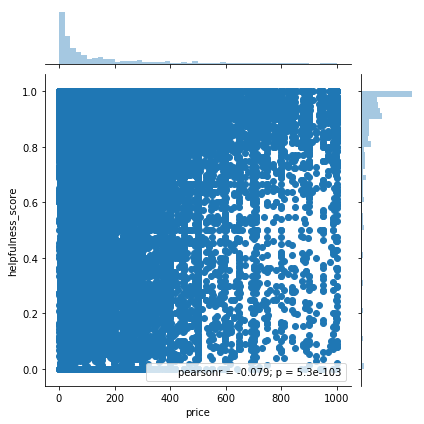

In [100]:
sns.jointplot(x='price', y='helpfulness_score', data=df2, kind='scatter')

In [101]:
sns.jointplot(x='price', y='helpfulness_score', data=df2, kind='kde')

In [102]:
df2['helpfulness_score'].corr(df2['price'])

-0.079008179698043218

In [105]:
meta_data_filtered['description'].head()

0    Like its award-winning predecessor, the Intell...
1    HDTV Adapter Kit for NOOK HD and NOOK HD+\r\nT...
2    Power up your device with this Barnes &amp; No...
3    The VideoSecu TV mount is a mounting solution ...
4    Barnes & Noble Nook eReader - no 3GMeet nook. ...
Name: description, dtype: object

In [133]:
df.sort_values(by=['helpfulness_score'], ascending=False)['reviewText'][5]

'I mounted this in my RV and it holds a 26" LCD TV / DVD combo.  Installation was very easy and the mount works GREAT!  I was prepared to pay 5 times the price for a mount that would work as I wanted.  I couldn\'t be happier.'

In [130]:
txt=meta_data_filtered[meta_data_filtered['asin']=='0972683275']['description']

In [131]:
print(txt[3])

The VideoSecu TV mount is a mounting solution for most 22"-47" LCD LED Plasma TV and some LED up to 55". It fits VESA 600x400mm (24"x16"), 400x400mm (16"x16"), 400x200mm (16"x8"),300x300mm (12"x12"),200x200mm (8"x8"),200x100mm (8"x4") mounting hole pattern on the back of your TV. Heavy gauge steel construction provides safety loading up to 66lbs display. The two-link arm design provides up to 180 degrees of swivel, 15 degrees tilt up or down, and 24" extension, make it easier for get perfect viewing angle. The removable VESA plate can be taken off for easy installation. Post-installation level adjustment allows the TV to perfectly level. The on arm cable management ring system design, guides wires and prevent cable pinching. Standard hardware and user manual included. Note: From Nov 27, 600x400 adapters are provided with this product.


In [134]:
len(meta_data_filtered)

50703

In [136]:
df['reviewerID'].value_counts()

A5JLAU2ARJ0BO     198
A6FIAB28IS79      123
A17BUUBOU0598B    117
ADLVFFE4VBT8      108
A231WM2Z2JL0U3     99
AOEAD7DPLZE53      98
A680RUE1FDO8B      92
A1F9Z42CFF9IAY     78
A38RMU1Y5TDP9      73
A2BMZRO0H7TFCS     71
AEJAGHLC675A7      67
A203OCQQ12MAVT     67
AT6CZDCP4TRGA      64
A2UQK3DAZ8NO2T     61
A3EXWV8FNSSFL6     61
A2XRMQA6PJ5ZJ8     59
A1JUBRIZMO0RJV     57
A2UOHALGF2X77Q     54
AWPODHOB4GFWL      53
A3OXHLG6DIBRW8     52
A2ARDVMUGDFED6     52
A4WEZJOIZIV4U      50
A3U41ZL33SS92P     49
A250AXLRBVYKB4     48
A38KK0SZYEH5UD     47
AGXMC3ITWZASE      47
A3CG93783LP0FO     46
AKT8TGIT6VVZ5      46
A23GFTVIETX7DS     45
A18HE80910BTZI     45
                 ... 
A5DEEC9LRK5HJ       1
A2XRPHQSX6C9S2      1
AOVI5Y45L6B0J       1
A17RBSXCSV8FQE      1
A3GP1VN1FUMFE3      1
A254AJNBQBKGVJ      1
A3RT0UGQ0JM8P0      1
AMSY38QHB7W0Q       1
A36BYUUDNFMMJI      1
A1FYA4LW5VFMX2      1
A92XTCS0ZTX6I       1
A372YX80GGM7DR      1
A2WL88J22CRY6O      1
A1E7TJ3H5TT73P      1
A1D9KX0THM